### Solving for a differentially private median age of a population

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pa = pd.read_csv("psam_p42.csv")

In [3]:
"""
Solving for a differentially private median age of a population.
1. find the median value
2. add laplace noise with sensitivity value of max_age/2
"""
asn_pa = pa.query('RACASN==1 and PUMA==1000')
true_median = asn_pa.AGEP.median()
age_sensitivity = asn_pa.AGEP.max()/2

In [4]:
def laplace_mech(mu, epsilon, sensitivity=1.0):
    """Implementation of the Laplace Mechanism that adds Laplacian-distributed noise to a function.
  　
    Args:
      mu (float or numpy array): the true answer
      epsilon(int): the privacy budget
      sensitivity (float): the global sensitivity of the query
    """
    eps = epsilon/float(sensitivity)
    scale = 1/eps
    np_shape = np.shape(mu)
    shape = None if np_shape == () else np_shape
    z = np.random.laplace(0.0, scale=scale, size=shape)
    return mu + z

In [5]:
def avg_l1_median(true_median, eps, n=1000):
    total = 0
    for i in range(n):
        noisy_median = laplace_mech(true_median, eps, age_sensitivity)
        accuracy = 1 - (np.linalg.norm([noisy_median-true_median], 1)/(2*1))
        total += accuracy
    return total/n

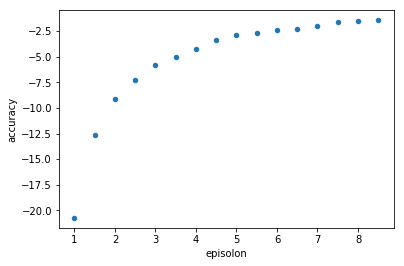

In [6]:
accuracy_df = pd.DataFrame()
eps_range = (np.arange(1.0,9.0,.5))
accuracy_df['episolon'] = eps_range
accuracy_df['accuracy'] = [avg_l1_median(true_median, x) for x in eps_range]
accuracy_df.plot.scatter('episolon', 'accuracy')
plt.show()